In [63]:
import pandas as pd

df = pd.read_csv('../data/aggregated_dataset.csv')
df.head()


,Unnamed: 0,name,geometry,cost,beds,baths,parkings,SA2_CODE21,SA2_NAME21,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket
0,0,904/265 Exhibition Street Melbourne VIC 3000,POINT (144.9691204 -37.8095116),850.0,2.0,2.0,1.0,206041503,Melbourne CBD - East,0.6452,1.7146,0.7007,2.1130,0.3461,0.743333
1,6,2302/17 Spring Street Melbourne VIC 3000,POINT (144.9744021 -37.8147493),1500.0,2.0,2.0,1.0,206041503,Melbourne CBD - East,0.4319,2.7503,1.1439,2.4385,0.5171,2.190000
2,12,11/187 Collins Street Melbourne VIC 3000,POINT (144.9678522 -37.81540469999999),800.0,1.0,1.0,NaN,206041503,Melbourne CBD - East,2.1035,2.8712,1.2648,2.7744,0.2480,2.823333
3,19,1605/68 La Trobe Street Melbourne VIC 3000,POINT (144.9667899 -37.8083648),590.0,2.0,1.0,1.0,206041503,Melbourne CBD - East,1.0761,1.6096,0.9307,2.0254,0.4471,2.193333
4,21,3007/35 Spring Street Melbourne VIC 3000,POINT (144.9740049 -37.8141725),2300.0,3.0,2.0,2.0,206041503,Melbourne CBD - East,0.3607,2.6702,1.0638,2.2120,0.4370,1.968333


In [64]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# %matplotlib inline
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [65]:
df.shape[1]

15

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11674 entries, 0 to 11673
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11674 non-null  int64  
 1   name                 11674 non-null  object 
 2   geometry             11674 non-null  object 
 3   cost                 11674 non-null  float64
 4   beds                 11674 non-null  float64
 5   baths                11674 non-null  float64
 6   parkings             9745 non-null   float64
 7   SA2_CODE21           11674 non-null  int64  
 8   SA2_NAME21           11674 non-null  object 
 9   Nearest_station      11674 non-null  float64
 10  Nearest_park         11674 non-null  float64
 11  Nearest_shop         11674 non-null  float64
 12  Nearest_hospital     11674 non-null  float64
 13  Nearest_school       11674 non-null  float64
 14  Nearest_supermarket  11674 non-null  float64
dtypes: float64(10), int64(2), object(3)


In [67]:
df.isnull().sum()

Unnamed: 0                0
name                      0
geometry                  0
cost                      0
beds                      0
baths                     0
parkings               1929
SA2_CODE21                0
SA2_NAME21                0
Nearest_station           0
Nearest_park              0
Nearest_shop              0
Nearest_hospital          0
Nearest_school            0
Nearest_supermarket       0
dtype: int64

In [68]:
df[df.isnull().any(axis=1)]

,Unnamed: 0,name,geometry,cost,beds,baths,parkings,SA2_CODE21,SA2_NAME21,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket
2,12,11/187 Collins Street Melbourne VIC 3000,POINT (144.9678522 -37.81540469999999),800.0,1.0,1.0,NaN,206041503,Melbourne CBD - East,2.1035,2.8712,1.2648,2.7744,0.2480,2.823333
7,51,L03/68 La Trobe Street Melbourne VIC 3000,POINT (144.9667899 -37.8083648),400.0,1.0,1.0,NaN,206041503,Melbourne CBD - East,1.0761,1.6096,0.9307,2.0254,0.4471,2.193333
11,78,24/27 Flinders Lane Melbourne VIC 3000,POINT (144.9733655 -37.8147317),585.0,2.0,1.0,NaN,206041503,Melbourne CBD - East,0.7578,2.6057,0.9993,2.2939,0.3725,2.255000
13,85,703/233 Collins Street Melbourne VIC 3000,POINT (144.9660296 -37.8158618),600.0,1.0,1.0,NaN,206041503,Melbourne CBD - East,2.4712,2.4003,1.1646,2.4182,1.0878,0.535000
16,94,513/33 Mackenzie Street Melbourne VIC 3000,POINT (144.9669868 -37.8078362),550.0,1.0,1.0,NaN,206041503,Melbourne CBD - East,0.8886,1.4221,0.7432,1.8379,0.2596,1.203333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,11480,52 Childers Street Cranbourne VIC 3977,POINT (145.289034 -38.112789),320.0,1.0,1.0,NaN,212031300,Cranbourne,2.3662,7.5754,1.7001,25.2423,0.2200,2.066667
11501,11484,11 Talara Court Cranbourne VIC 3977,POINT (145.2903116 -38.0967489),500.0,3.0,2.0,NaN,212031300,Cranbourne,2.1303,5.9619,2.9490,23.1843,1.8128,2.055000
11506,11500,34 Dearing Avenue Cranbourne VIC 3977,POINT (145.2788243 -38.1061479),298.0,1.0,1.0,NaN,212031300,Cranbourne,1.1041,8.1640,0.8869,24.6163,0.4115,2.891667
11517,11463,1 Don Drive Cranbourne West VIC 3977,POINT (145.2593945 -38.1051085),420.0,3.0,1.0,NaN,212031304,Cranbourne West,2.7469,9.8067,3.6708,23.3326,1.9545,3.306667


In [69]:
# Replace missing values with 0
df_filled = df.fillna(0)
df_filled

,Unnamed: 0,name,geometry,cost,beds,baths,parkings,SA2_CODE21,SA2_NAME21,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket
0,0,904/265 Exhibition Street Melbourne VIC 3000,POINT (144.9691204 -37.8095116),850.0,2.0,2.0,1.0,206041503,Melbourne CBD - East,0.6452,1.7146,0.7007,2.1130,0.3461,0.743333
1,6,2302/17 Spring Street Melbourne VIC 3000,POINT (144.9744021 -37.8147493),1500.0,2.0,2.0,1.0,206041503,Melbourne CBD - East,0.4319,2.7503,1.1439,2.4385,0.5171,2.190000
2,12,11/187 Collins Street Melbourne VIC 3000,POINT (144.9678522 -37.81540469999999),800.0,1.0,1.0,0.0,206041503,Melbourne CBD - East,2.1035,2.8712,1.2648,2.7744,0.2480,2.823333
3,19,1605/68 La Trobe Street Melbourne VIC 3000,POINT (144.9667899 -37.8083648),590.0,2.0,1.0,1.0,206041503,Melbourne CBD - East,1.0761,1.6096,0.9307,2.0254,0.4471,2.193333
4,21,3007/35 Spring Street Melbourne VIC 3000,POINT (144.9740049 -37.8141725),2300.0,3.0,2.0,2.0,206041503,Melbourne CBD - East,0.3607,2.6702,1.0638,2.2120,0.4370,1.968333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,11586,21 Swallowtail Avenue Clyde North VIC 3978,POINT (145.3762985 -38.0840235),510.0,4.0,2.0,1.0,212031555,Clyde North - North,6.5979,6.0713,7.8176,28.0611,0.4323,10.038333
11670,11591,18 Flowerbloom Crescent Clyde North VIC 3978,POINT (145.3448321 -38.0764965),650.0,4.0,2.0,2.0,212031555,Clyde North - North,5.1715,2.9896,4.7359,22.2783,1.4282,4.990000
11671,11596,19 Anvil Way Clyde North VIC 3978,POINT (145.3604342 -38.08417439999999),475.0,3.0,2.0,2.0,212031555,Clyde North - North,5.7359,4.8191,6.5654,25.4616,1.2963,8.555000
11672,11604,51 Springleaf Avenue Clyde North VIC 3978,POINT (145.3501506 -38.0813448),680.0,4.0,2.0,2.0,212031555,Clyde North - North,5.2711,3.2310,5.5270,24.9969,1.8010,6.766667


In [70]:
df_filled.isnull().sum()

Unnamed: 0             0
name                   0
geometry               0
cost                   0
beds                   0
baths                  0
parkings               0
SA2_CODE21             0
SA2_NAME21             0
Nearest_station        0
Nearest_park           0
Nearest_shop           0
Nearest_hospital       0
Nearest_school         0
Nearest_supermarket    0
dtype: int64

In [71]:
columns_to_drop = ['Unnamed: 0', 'name', 'geometry', 'SA2_CODE21', 'SA2_NAME21']
df_filled = df_filled.drop(columns=columns_to_drop)
df_filled


,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket
0,850.0,2.0,2.0,1.0,0.6452,1.7146,0.7007,2.1130,0.3461,0.743333
1,1500.0,2.0,2.0,1.0,0.4319,2.7503,1.1439,2.4385,0.5171,2.190000
2,800.0,1.0,1.0,0.0,2.1035,2.8712,1.2648,2.7744,0.2480,2.823333
3,590.0,2.0,1.0,1.0,1.0761,1.6096,0.9307,2.0254,0.4471,2.193333
4,2300.0,3.0,2.0,2.0,0.3607,2.6702,1.0638,2.2120,0.4370,1.968333
...,...,...,...,...,...,...,...,...,...,...
11669,510.0,4.0,2.0,1.0,6.5979,6.0713,7.8176,28.0611,0.4323,10.038333
11670,650.0,4.0,2.0,2.0,5.1715,2.9896,4.7359,22.2783,1.4282,4.990000
11671,475.0,3.0,2.0,2.0,5.7359,4.8191,6.5654,25.4616,1.2963,8.555000
11672,680.0,4.0,2.0,2.0,5.2711,3.2310,5.5270,24.9969,1.8010,6.766667


In [72]:
df_filled = df_filled.replace([np.inf,-np.inf], np.nan)
df_filled = df_filled.fillna(999)
df_filled

,cost,beds,baths,parkings,Nearest_station,Nearest_park,Nearest_shop,Nearest_hospital,Nearest_school,Nearest_supermarket
0,850.0,2.0,2.0,1.0,0.6452,1.7146,0.7007,2.1130,0.3461,0.743333
1,1500.0,2.0,2.0,1.0,0.4319,2.7503,1.1439,2.4385,0.5171,2.190000
2,800.0,1.0,1.0,0.0,2.1035,2.8712,1.2648,2.7744,0.2480,2.823333
3,590.0,2.0,1.0,1.0,1.0761,1.6096,0.9307,2.0254,0.4471,2.193333
4,2300.0,3.0,2.0,2.0,0.3607,2.6702,1.0638,2.2120,0.4370,1.968333
...,...,...,...,...,...,...,...,...,...,...
11669,510.0,4.0,2.0,1.0,6.5979,6.0713,7.8176,28.0611,0.4323,10.038333
11670,650.0,4.0,2.0,2.0,5.1715,2.9896,4.7359,22.2783,1.4282,4.990000
11671,475.0,3.0,2.0,2.0,5.7359,4.8191,6.5654,25.4616,1.2963,8.555000
11672,680.0,4.0,2.0,2.0,5.2711,3.2310,5.5270,24.9969,1.8010,6.766667


In [73]:
row_index = 4023
df_filled.loc[row_index]

cost                   510.0
beds                     4.0
baths                    2.0
parkings                 2.0
Nearest_station        999.0
Nearest_park           999.0
Nearest_shop           999.0
Nearest_hospital       999.0
Nearest_school         999.0
Nearest_supermarket    999.0
Name: 4023, dtype: float64

In [74]:
cost = df['cost']
cost

0         850.0
1        1500.0
2         800.0
3         590.0
4        2300.0
          ...  
11669     510.0
11670     650.0
11671     475.0
11672     680.0
11673     550.0
Name: cost, Length: 11674, dtype: float64

## Correlation-based Feature Selection

### Pearson Correlation for linear relationships

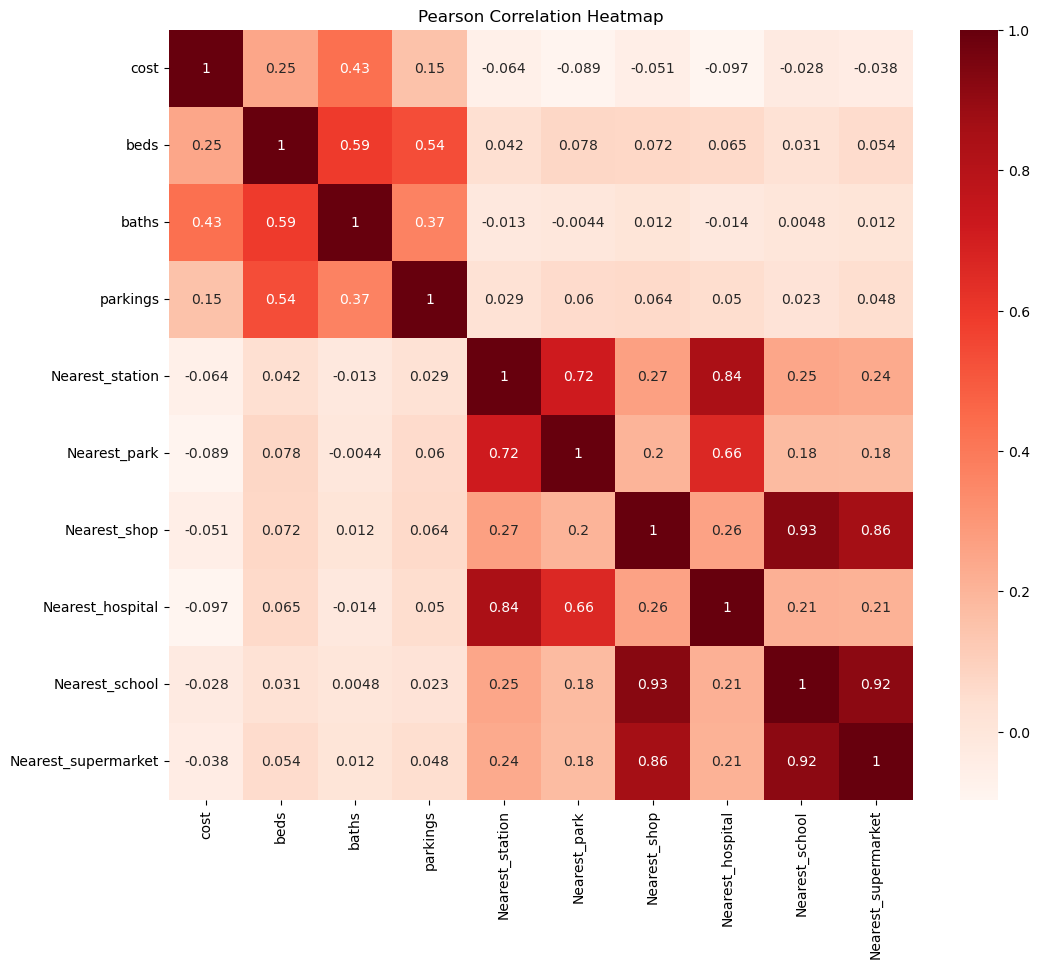

In [75]:
plt.figure(figsize=(12,10))
correlation_matrix = df_filled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.Reds)
plt.title("Pearson Correlation Heatmap")
plt.show()


In [76]:
#Correlation with output variable
cor_target = abs(correlation_matrix["cost"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.1]
relevant_features

cost        1.000000
beds        0.247094
baths       0.431135
parkings    0.151822
Name: cost, dtype: float64

##### As we can see, features beds, baths, parkings, Nearest_park, Nearest_hospital, Nearest_supermarket are highly correlated with the output variable cost compared to others. Hence we will drop all other features apart from these. However this is not the end of the process. One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [77]:
df_filled[['beds', 'baths']].corr()

,beds,baths
beds,1.000000,0.591988
baths,0.591988,1.000000


In [78]:
df_filled[['beds', 'parkings']].corr()

,beds,parkings
beds,1.000000,0.535541
parkings,0.535541,1.000000


In [79]:
df_filled[['beds', 'Nearest_park']].corr()

,beds,Nearest_park
beds,1.000000,0.078364
Nearest_park,0.078364,1.000000


In [80]:
df_filled[['beds', 'Nearest_hospital']].corr()

,beds,Nearest_hospital
beds,1.000000,0.065152
Nearest_hospital,0.065152,1.000000


In [81]:
df_filled[['beds', 'Nearest_supermarket']].corr()

,beds,Nearest_supermarket
beds,1.000000,0.054453
Nearest_supermarket,0.054453,1.000000


##### From the above code, it is seen that the variables beds and baths are highly correlated with each other (0.535541). Hence we would keep only one variable and drop the other. We will keep baths since its correlation with cost is higher than that of beds. After dropping beds and parkings, we are left with features, baths, Nearest_park, Nearest_hospital, Nearest_supermarket. These are the final features given by Pearson correlation.

### Spearman correlation for non-linear relationships

In [82]:
from scipy.stats import spearmanr
correlation_dict = {}
target_variable = 'cost' 

for column in df_filled.columns:
    if column != target_variable:
        correlation, _ = spearmanr(df_filled[column], df_filled[target_variable])
        correlation_dict[column] = correlation
        
sorted_features = sorted(correlation_dict.items(), key=lambda x: abs(x[1]), reverse=True)
threshold = 0.2  # Adjust the threshold as needed
selected_features = [feature for feature, correlation in sorted_features if abs(correlation) > threshold]
# X = df_filled[selected_features]
# y = df_filled[target_variable]  
      

In [83]:
correlation_dict

{'beds': 0.25650597410103265,
 'baths': 0.43373975400121245,
 'parkings': 0.1117637671596187,
 'Nearest_station': -0.19851283643232084,
 'Nearest_park': -0.32190959587943324,
 'Nearest_shop': -0.11735351276545648,
 'Nearest_hospital': -0.3334079691025415,
 'Nearest_school': -0.10217259465578445,
 'Nearest_supermarket': -0.22783911131942036}

In [84]:
sorted_features

[('baths', 0.43373975400121245),
 ('Nearest_hospital', -0.3334079691025415),
 ('Nearest_park', -0.32190959587943324),
 ('beds', 0.25650597410103265),
 ('Nearest_supermarket', -0.22783911131942036),
 ('Nearest_station', -0.19851283643232084),
 ('Nearest_shop', -0.11735351276545648),
 ('parkings', 0.1117637671596187),
 ('Nearest_school', -0.10217259465578445)]

In [85]:
selected_features

['baths', 'Nearest_hospital', 'Nearest_park', 'beds', 'Nearest_supermarket']